In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
json_pwd_transfer = "/Users/admin/experiments/nt3_s32_p64_1epoch_exptransfer_1gpu_out2/history"
nas_results_path_transfer="/Users/admin/experiments/nt3_s32_p64_1epoch_exptransfer_1gpu_out2/results.csv"

json_pwd_baseline = "/Users/admin/experiments/nt3_s32_p64_1epoch_expbaseline_1gpu_out/history"
nas_results_path_baseline="/Users/admin/experiments/nt3_s32_p64_1epoch_expbaseline_1gpu_out/results.csv"


In [47]:
df_baseline = pd.read_csv(nas_results_path_baseline)
df_transfer = pd.read_csv(nas_results_path_transfer)

print(df_baseline)
print(df_transfer)

                      arch_seq    id  objective  elapsed_sec    duration
0    [8, 15, 1, 0, 6, 2, 0, 7]     1   0.485714   199.113100  102.785173
1    [2, 17, 1, 2, 4, 0, 0, 5]     2   0.514286   200.502437  104.174454
2     [7, 3, 2, 0, 2, 2, 2, 1]     3   0.860714   201.835226  105.507200
3     [3, 5, 0, 0, 6, 2, 1, 7]     4   0.850000   203.432779  107.104707
4    [2, 16, 0, 2, 4, 2, 0, 2]     5   0.485714   204.729851  108.401739
..                         ...   ...        ...          ...         ...
995  [3, 25, 2, 0, 3, 0, 0, 7]   996   0.785714  1666.247322  380.901512
996   [4, 0, 1, 2, 7, 0, 2, 3]   997   0.500000  1668.191306  381.187358
997  [3, 25, 0, 1, 3, 0, 0, 7]   998   0.957143  1669.676278  381.112423
998  [3, 25, 0, 1, 3, 0, 2, 7]   999   0.932143  1671.289965  381.350350
999  [3, 25, 0, 1, 0, 0, 1, 7]  1000   0.514286  1672.838926  381.378950

[1000 rows x 5 columns]
                       arch_seq    id  objective  elapsed_sec    duration
0     [8, 15, 1, 0, 6, 2,

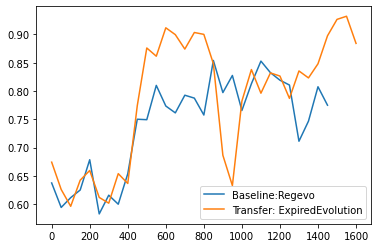

In [49]:
import math

#groupyBy and subtract the first
duration_quantized_baseline = df_baseline.elapsed_sec.apply( lambda x: 50*math.floor((x - 199)/50)) 
duration_quantized_transfer = df_transfer.elapsed_sec.apply( lambda x: 50*math.floor((x - 292.9)/50)) 

df_baseline['quantized_duration']  = duration_quantized_baseline 
df_transfer['quantized_duration']  = duration_quantized_transfer

#TODO: highest 
result_baseline = df_baseline.groupby('quantized_duration').mean()
result_transfer = df_transfer.groupby('quantized_duration').mean()



 

plt.plot(result_baseline.index, result_baseline['objective'],  label='Baseline:Regevo' )
plt.plot(result_transfer.index, result_transfer['objective'], label='Transfer: ExpiredEvolution' )
plt.xlabel()
plt.label()
plt.legend()

In [66]:
import json
import os
# assign directory
directory = json_pwd_baseline

# iterate over files in
# that directory
json_filepaths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        json_filepaths.append(f)

training_times = []
storing_times = []
num_layers_transferred = []
for json_file in json_filepaths:
    f = open (json_file, "r")
    data = json.loads(f.read())
    training_times.append(data['training_time'])
    storing_times.append(data['storing_time'])
    num_layers_transferred.append(data['num_layers_transferred'])
    
mean_training_time_baseline = np.mean(training_times)   
mean_storing_time_baseline = np.mean(storing_times) 
mean_layer_transferred_baseline = np.mean(num_layers_transferred)

In [67]:
import json
import os
# assign directory
directory = json_pwd_transfer

# iterate over files in
# that directory
json_filepaths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        json_filepaths.append(f)

training_times = []
storing_times = []
num_layers_transferred = []
for json_file in json_filepaths:
    f = open (json_file, "r")
    data = json.loads(f.read())
    training_times.append(data['training_time'])
    storing_times.append(data['storing_time'])
    num_layers_transferred.append(data['num_layers_transferred'])
    
mean_training_time_transfer = np.mean(training_times)   
mean_storing_time_transfer = np.mean(storing_times) 
mean_layer_transferred_transfer = np.mean(num_layers_transferred)

Text(0, 0.5, 'training time ')

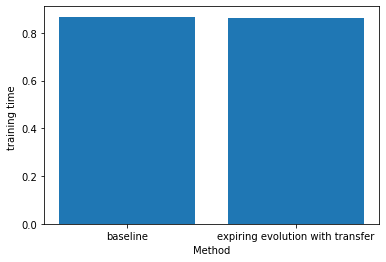

In [68]:
x = ['baseline', 'expiring evolution with transfer']
plt.bar(x, [mean_training_time_transfer,mean_training_time_baseline] )
plt.xlabel('Method')
plt.ylabel('training time ')

Text(0, 0.5, 'storing time ')

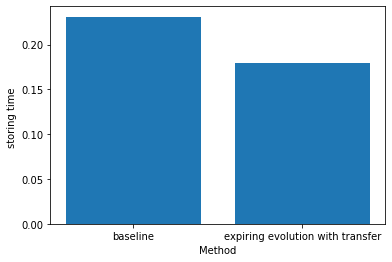

In [69]:
plt.bar(x, [mean_storing_time_transfer,mean_storing_time_baseline] )
plt.xlabel('Method')
plt.ylabel('storing time ')

([<matplotlib.axis.XTick at 0x7f82524ce5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

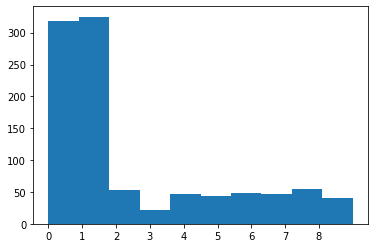

In [83]:
num_layers_transferred.sort()
num_layers_transferred
plt.hist(num_layers_transferred)
plt.xticks(range(0,9))

#1) potentiaally not correctfully parameterizing our transfer - not transf
#2) not properly accountign for 300 - some reason we are not transferring
#3) random seed - print which index we select when we do the mutation. Consistently a high number index

In [ ]:
average checkpoint size: 30MB
checkpoint size of all checkpoints 31G

#training time should decrease as we get to larger models. Not obvious when that will happen

#what's going on with 300
#right skewed histogram